## Finance and Python Syntax

In [1]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [2]:
from numpy import *

I = 100000

random.seed(1000)
z = random.standard_normal(I)
ST = S0 * exp(r * T + sigma * sqrt(T) * z)
hT = maximum(ST - K, 0)
C0 = exp(-r * T) * sum(hT) / I

In [3]:
print "Value of the European Call Option %5.3f" % C0

Value of the European Call Option 9.149


## Time-to-Results

In [4]:
import numpy as np
import pandas as pd
import pandas.io.data as web
import pandas as pd

d:\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [5]:
#goog = web.DataReader('GOOG', data_source='google',start='3/14/2009', end='4/14/2014')
#goog.index.name = u'Date'
#goog.tail()
goog = pd.read_csv('data/goog.csv') 
#goog[:5]
goog.tail()

,﻿Date,Open,High,Low,Close,Volume
246,24-Oct-16,804.90,815.18,804.82,813.11,1697514
247,21-Oct-16,795.00,799.50,794.00,799.37,1266181
248,20-Oct-16,803.30,803.97,796.03,796.97,1757528
249,19-Oct-16,798.86,804.63,797.64,801.56,1766798
250,18-Oct-16,787.85,801.61,785.56,795.26,2056903


In [6]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
goog['Volatility'] = pd.rolling_std(goog['Log_Ret'], window=252) * np.sqrt(252)

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  from ipykernel import kernelapp as app


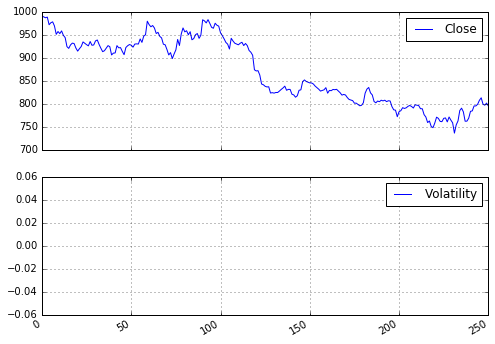

In [7]:
%matplotlib inline
goog[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6), grid=True);
# tag: goog_vola
# title: Google closing prices and yearly volatility

## Paradigm

In [8]:
#loops = 25000000
loops = 25000
from math import *
a = range(1, loops)
def f(x):
    return 3 * log(x) + cos(x) ** 2
%timeit r = [f(x) for x in a]

100 loops, best of 3: 15.4 ms per loop


In [9]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

1000 loops, best of 3: 818 µs per loop


In [10]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

The slowest run took 214.46 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 938 µs per loop


In [11]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

The slowest run took 6.21 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 211 µs per loop
